In [605]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential

import os
os.getcwd()

'C:\\Users\\Tim\\Documents\\machine_learning_class\\Contest1\\models\\image_generation'

In [606]:
dataframe = pd.read_csv('../../test.csv')
dataset = dataframe.values
x_val = dataset.astype(float)

In [607]:
dataframe = pd.read_csv('../../train.csv', delimiter=',')
print(dataframe.shape)

dataset = dataframe.values

y_train = dataset[:,0]
x_train = dataset[:,1:len(dataframe.columns)].astype(float)

(178, 1201)


In [608]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

def encode(y):
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y_train)
    return to_categorical(y), encoder
    
y_train, y_encoder = encode(y_train)
print(y_encoder.classes_)
y_train.view()

['cold' 'dusk' 'flowers' 'impressions' 'oval' 'scene' 'trees' 'water']


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [609]:
def y_converter(y, encoder):
    return encoder.inverse_transform(np.argmax(y, axis=1))

y_converter(y_train, y_encoder).view()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['oval', 'flowers', 'cold', 'scene', 'water', 'impressions',
       'impressions', 'impressions', 'cold', 'impressions', 'trees',
       'dusk', 'water', 'trees', 'trees', 'water', 'water', 'flowers',
       'scene', 'dusk', 'oval', 'dusk', 'flowers', 'water', 'flowers',
       'trees', 'flowers', 'flowers', 'water', 'cold', 'cold', 'trees',
       'trees', 'dusk', 'flowers', 'trees', 'scene', 'scene', 'cold',
       'dusk', 'dusk', 'flowers', 'cold', 'scene', 'scene', 'impressions',
       'water', 'water', 'flowers', 'cold', 'water', 'dusk', 'water',
       'water', 'dusk', 'flowers', 'impressions', 'impressions',
       'impressions', 'water', 'scene', 'scene', 'dusk', 'water',
       'impressions', 'scene', 'flowers', 'scene', 'cold', 'water',
       'scene', 'dusk', 'dusk', 'scene', 'water', 'cold', 'scene',
       'scene', 'impressions', 'impressions', 'cold', 'cold', 'trees',
       'impressions', 'scene', 'flowers', 'dusk', 'dusk', 'flowers',
       'cold', 'oval', 'water

In [474]:
x_train.shape
x_train.dtype

dtype('float64')

In [339]:
from keras.optimizers import SGD
from keras.constraints import maxnorm

def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=1200, kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, activation='softmax'))

    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])
    return model

In [340]:

model = create_model(0.5, 0)
model.fit(x_train, y_train, epochs=100, batch_size=20, verbose=0)

In [341]:
score = model.evaluate(x_train, y_train, batch_size=20)

178/178 [==============================] - 0s 1ms/step


In [342]:
print(score)

[1.990357657496849, 0.19662921817115184]


In [343]:
history = model.fit(x_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

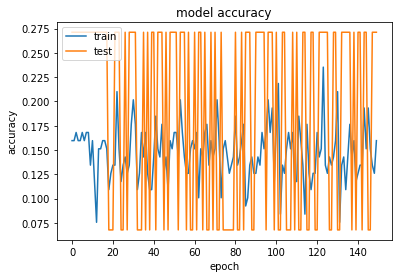

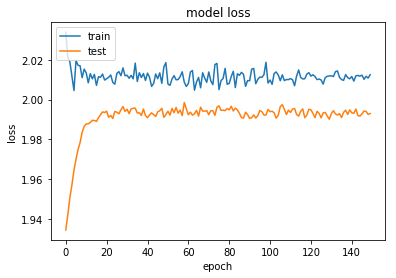

In [344]:
import matplotlib.pyplot as plt

# list all data in history
def history_plot(history):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
history_plot(history)

In [610]:
def img_converter(x):
    obs = len(x)
    r = x[:, 0:1198:3]
    g = x[:, 1:1199:3]
    b = x[:, 2:1200:3]
    r = r[:,:].reshape(obs, 20, 20)
    g = g[:,:].reshape(obs, 20, 20)
    b = b[:,:].reshape(obs, 20, 20)
    rgb = np.stack((r, g, b), axis=1)
    return rgb

x_train = img_converter(x_train)
x_train.shape

(178, 3, 20, 20)

In [611]:
x_val = img_converter(x_val)
x_val.shape

(63, 3, 20, 20)

In [364]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

def covnet():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))

    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [599]:
model = covnet()
history = model.fit(x_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

In [600]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

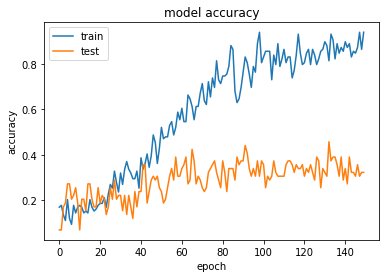

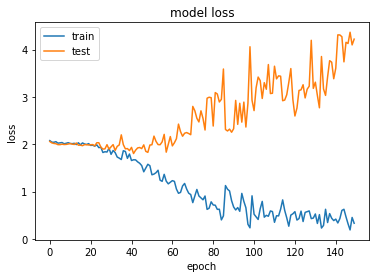

In [601]:
history_plot(history)

In [454]:
test_outcomes = model.predict(x_val, batch_size=10)
id_data = np.r_[1:64]
class_data = y_converter(test_outcomes, y_encoder)
test_df = pd.DataFrame(data={'id': id_data, 'class': class_data}, columns=['id', 'class'])
test_df.to_csv('covnet_sub.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


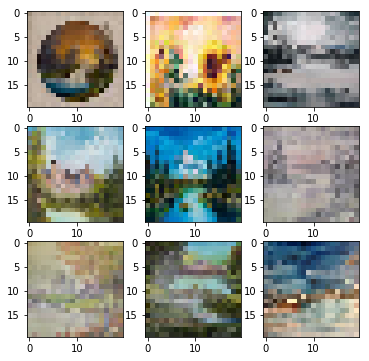

In [357]:
plt.figure(figsize=(6, 6))
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])

plt.show()

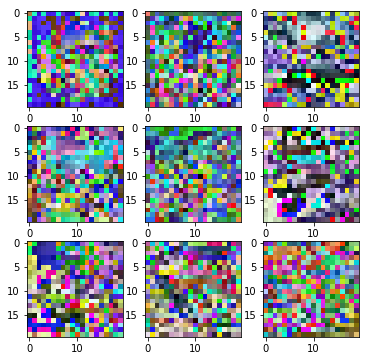

In [554]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(x_train)

plt.figure(figsize=(6, 6))
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i])
    # show the plot
    pyplot.show()
    break

C:\ProgramData\Anaconda3\lib\site-packages\keras\preprocessing\image.py:492: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


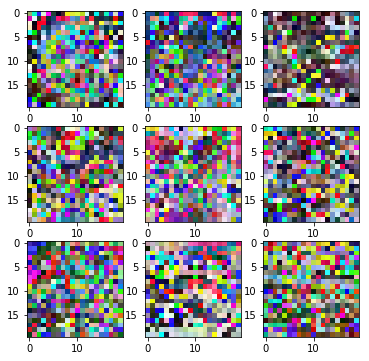

In [555]:
datagen = ImageDataGenerator(zca_whitening=True)
datagen.fit(x_train)

plt.figure(figsize=(6, 6))
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i])
    # show the plot
    pyplot.show()
    break

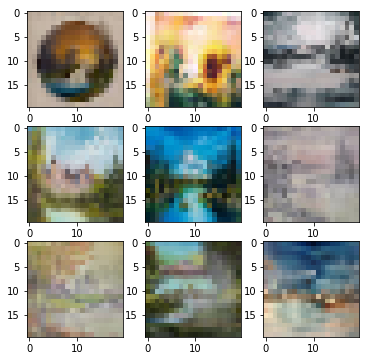

In [561]:
shift = 0.01
datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=shift, height_shift_range=shift, rotation_range=5)
datagen.fit(x_train)

plt.figure(figsize=(6, 6))
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i])
    # show the plot
    pyplot.show()
    break

In [632]:
from sklearn.model_selection import train_test_split

x_training, x_testing, y_training, y_testing = train_test_split(x_train, y_train, test_size=0.33)


def network_gens(center=False, std=False, zca=False, shift=0.01):
    train = ImageDataGenerator(
        featurewise_center=False,
        featurewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=5,
        width_shift_range=shift,
        height_shift_range=shift,
        horizontal_flip=True)

    test = ImageDataGenerator(
        featurewise_center=False,
        featurewise_std_normalization=False,
        zca_whitening=False)
    return train, test

train_gen, test_gen = network_gens(center=True, std=True, zca=True)

train_gen.fit(x_training)
test_gen.fit(x_testing)

C:\ProgramData\Anaconda3\lib\site-packages\keras\preprocessing\image.py:722: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (119, 3, 20, 20) (20 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')
C:\ProgramData\Anaconda3\lib\site-packages\keras\preprocessing\image.py:722: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (59, 3, 20, 20) (20 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


In [563]:
model = covnet()
history = model.fit_generator(
    train_gen.flow(x_training, y_training, batch_size=10),
    steps_per_epoch=len(x_training) / 10, 
    epochs=150,
    validation_data=test_gen.flow(x_testing, y_testing, batch_size=10),
    validation_steps=len(x_testing) / 10,
    verbose=0)

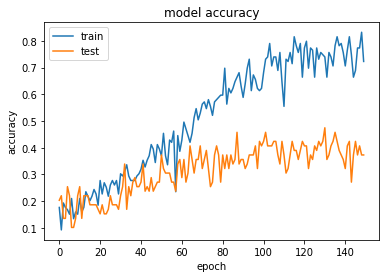

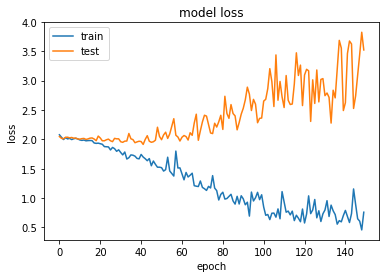

In [564]:
history_plot(history)

In [537]:
test_gen.fit(x_val)
test_outcomes = model.predict_generator(test_gen.flow(x_val, shuffle=False))

id_data = np.r_[1:64]
class_data = y_converter(test_outcomes, y_encoder)
test_df = pd.DataFrame(data={'id': id_data, 'class': class_data}, columns=['id', 'class'])
test_df.to_csv('covnet_sub_data_gen_norm_std.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [549]:
from keras.optimizers import rmsprop

def deep_cnn(num_classes=8):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=(20, 20, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = rmsprop(lr=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

In [594]:
model = deep_cnn()
history = model.fit(x_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

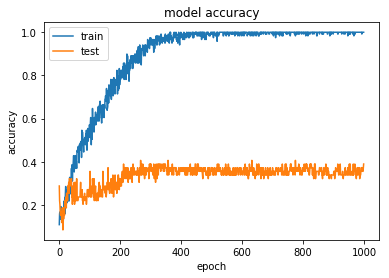

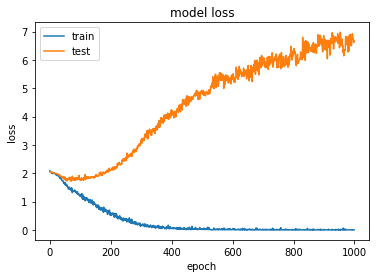

In [595]:
history_plot(history)

In [565]:
test_outcomes = model.predict(x_val, batch_size=10)
id_data = np.r_[1:64]
class_data = y_converter(test_outcomes, y_encoder)
test_df = pd.DataFrame(data={'id': id_data, 'class': class_data}, columns=['id', 'class'])
test_df.to_csv('deepcnn_sub.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [625]:
"""Trains a ResNet on the CIFAR10 dataset.

ResNet v1
[a] Deep Residual Learning for Image Recognition
https://arxiv.org/pdf/1512.03385.pdf

ResNet v2
[b] Identity Mappings in Deep Residual Networks
https://arxiv.org/pdf/1603.05027.pdf
"""

from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os

# Training parameters
batch_size = 10  # orig paper trained all networks with batch_size=128
epochs = 200
num_classes = 8

# Subtracting pixel mean improves accuracy
subtract_pixel_mean = True

n = 3

# Model version
# Orig paper: version = 1 (ResNet v1), Improved ResNet: version = 2 (ResNet v2)
version = 1

# Computed depth from supplied model parameter n
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# Input image dimensions.
input_shape = (3, 20, 20)

# If subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean

def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            activation-bn-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=8):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    # so filters are of size 20x20 / 2
    num_filters = 10
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs, num_filters=num_filters)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=1)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model


def resnet_v2(input_shape, depth, num_classes=8):
    """ResNet Version 2 Model builder [b]

    Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as
    bottleneck layer
    First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filter maps is
    doubled. Within each stage, the layers have the same number filters and the
    same filter map sizes.
    Features maps sizes:
    conv1  : 32x32,  16
    stage 0: 32x32,  64
    stage 1: 16x16, 128
    stage 2:  8x8,  256

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 9 != 0:
        raise ValueError('depth should be 9n+2 (eg 56 or 110 in [b])')
    # Start model definition.
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)

    inputs = Input(shape=input_shape)
    # v2 performs Conv2D with BN-ReLU on input before splitting into 2 paths
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)

    # Instantiate the stack of residual units
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:  # first layer and first stage
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  # first layer but not first stage
                    strides = 2    # downsample

            # bottleneck residual unit
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # Add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [629]:
if version == 2:
    model = resnet_v2(input_shape=input_shape, depth=depth)
else:
    model = resnet_v1(input_shape=input_shape, depth=depth)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])

# Prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_resnet.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]

# Run training, with or without data augmentation.

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.33,
          shuffle=True,
          callbacks=callbacks,
          verbose=0)

(?, 3, 20, 10)
Learning rate:  0.001
Learning rate:  0.001

Epoch 00001: val_acc improved from -inf to 0.16949, saving model to C:\Users\Tim\Documents\machine_learning_class\Contest1\models\image_generation\saved_models\cifar10_resnet.h5
Learning rate:  0.001

Epoch 00002: val_acc improved from 0.16949 to 0.25424, saving model to C:\Users\Tim\Documents\machine_learning_class\Contest1\models\image_generation\saved_models\cifar10_resnet.h5
Learning rate:  0.001

Epoch 00003: val_acc improved from 0.25424 to 0.27119, saving model to C:\Users\Tim\Documents\machine_learning_class\Contest1\models\image_generation\saved_models\cifar10_resnet.h5
Learning rate:  0.001

Epoch 00004: val_acc improved from 0.27119 to 0.28814, saving model to C:\Users\Tim\Documents\machine_learning_class\Contest1\models\image_generation\saved_models\cifar10_resnet.h5
Learning rate:  0.001

Epoch 00005: val_acc improved from 0.28814 to 0.33898, saving model to C:\Users\Tim\Documents\machine_learning_class\Contest1\m


Epoch 00106: val_acc did not improve
Learning rate:  0.0001

Epoch 00107: val_acc did not improve
Learning rate:  0.0001

Epoch 00108: val_acc did not improve
Learning rate:  0.0001

Epoch 00109: val_acc did not improve
Learning rate:  0.0001

Epoch 00110: val_acc did not improve
Learning rate:  0.0001

Epoch 00111: val_acc did not improve
Learning rate:  0.0001

Epoch 00112: val_acc did not improve
Learning rate:  0.0001

Epoch 00113: val_acc did not improve
Learning rate:  0.0001

Epoch 00114: val_acc did not improve
Learning rate:  0.0001

Epoch 00115: val_acc did not improve
Learning rate:  0.0001

Epoch 00116: val_acc did not improve
Learning rate:  0.0001

Epoch 00117: val_acc did not improve
Learning rate:  0.0001

Epoch 00118: val_acc did not improve
Learning rate:  0.0001

Epoch 00119: val_acc did not improve
Learning rate:  0.0001

Epoch 00120: val_acc did not improve
Learning rate:  0.0001

Epoch 00121: val_acc did not improve
Learning rate:  1e-05

Epoch 00122: val_acc did

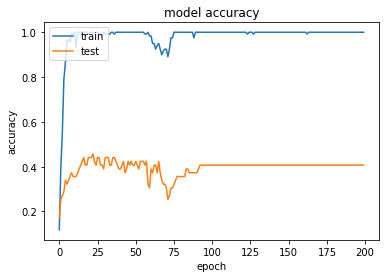

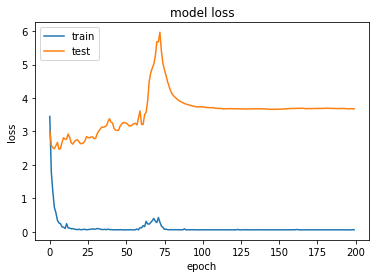

In [630]:
history_plot(history)

In [633]:
score = model.evaluate(x_testing, y_testing, batch_size=20)
print(score)

59/59 [==============================] - 0s 1ms/step
[1.600250781592676, 0.7457627088336621]


In [634]:
test_outcomes = model.predict(x_val, batch_size=10)
id_data = np.r_[1:64]
class_data = y_converter(test_outcomes, y_encoder)
test_df = pd.DataFrame(data={'id': id_data, 'class': class_data}, columns=['id', 'class'])
test_df.to_csv('resnet_sub.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
